In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./../Data/Old_Bailey_speech_features.csv', index_col=0)

In [3]:
print('Number of unique speakers:', len(set(df['speaker'])))
print('Average number of sentences uttered per speaker:', df.shape[0]/len(set(df['speaker'])))
print()
print('Number of documents:', len(set(df['filename'])))
print('Average number of sentences per file:', df.shape[0]/len(set(df['filename'])))

Number of unique speakers: 321
Average number of sentences uttered per speaker: 6.230529595015576

Number of documents: 148
Average number of sentences per file: 13.513513513513514


In [4]:
print('Total number of sentences:', df.shape[0])
print('Powerless:', df[df['label']==1].shape[0], f"({df[df['label']==1].shape[0]*100/df.shape[0]}%)")
print('Neutral:', df[df['label']==2].shape[0], f"({df[df['label']==2].shape[0]*100/df.shape[0]}%)")
print('Powerful', df[df['label']==3].shape[0], f"({df[df['label']==3].shape[0]*100/df.shape[0]}%)")

Total number of sentences: 2000
Powerless: 439 (21.95%)
Neutral: 1361 (68.05%)
Powerful 200 (10.0%)


In [5]:
print('Average number of powerless sentences per file:', df[df['label']==1].shape[0]/len(set(df['filename'])))
print('Average number of powerful sentences per file:', df[df['label']==3].shape[0]/len(set(df['filename'])))
print('Average number of neutral sentences per file:', df[df['label']==2].shape[0]/len(set(df['filename'])))

Average number of powerless sentences per file: 2.9662162162162162
Average number of powerful sentences per file: 1.3513513513513513
Average number of neutral sentences per file: 9.195945945945946


In [6]:
359/2000

0.1795

In [7]:
df.loc[df['SentenceLength'] == 2].loc[df['Count_Yes_no'] == 0].loc[df['label']==1]

,filename,sent_id,speaker,text,label,first_name,last_name,tokens,lemmas,pos,...,WordsVsUnique,Count_Adv_hedging,Count_V_hedging,Count_V_conj_hedging,Count_Adj_hedging,Count_Adv_intensifying,Count_V_intensifying,Count_Adj_intensifying,Count_Yes_no,gender
1118,1800-01-15_t18000115-86-verdict513.txt,113,ANN BRYDGES,Sometimes.,1,ANN,BRYDGES,"['Sometimes', '.']","['sometimes', '.']","[86, 97]",...,1.0,1,0,0,0,0,0,0,0,female


In [8]:
print('Number of one word sentences:', df[df['SentenceLength'] == 2].shape[0])
print('Number of neutral one word sentences:', df.loc[df['SentenceLength'] == 2].loc[df['label'] == 2].shape[0], f"({df.loc[df['SentenceLength'] == 2].loc[df['label'] == 2].shape[0]*100/df[df['SentenceLength'] == 2].shape[0]}%)")
print('Number of yes/no sentences:', df.loc[df['SentenceLength'] == 2].loc[df['Count_Yes_no'] == 1].shape[0], f"({df.loc[df['SentenceLength'] == 2].loc[df['Count_Yes_no'] == 1].shape[0]*100/df[df['SentenceLength'] == 2].shape[0]}%)")

Number of one word sentences: 359
Number of neutral one word sentences: 330 (91.92200557103064%)
Number of yes/no sentences: 309 (86.0724233983287%)


In [9]:
print('Number of sentences uttered by men:', df[df['gender'] == 'male'].shape[0], f"({df[df['gender'] == 'male'].shape[0]*100/df.shape[0]}%)")
print('Number of sentences uttered by women:', df[df['gender'] == 'female'].shape[0], f"({df[df['gender'] == 'female'].shape[0]*100/df.shape[0]}%)")
print('Number of sentences uttered by unknown gender:', df[df['gender'] == 'unknown'].shape[0], f"({df[df['gender'] == 'unknown'].shape[0]*100/df.shape[0]}%)")

Number of sentences uttered by men: 1676 (83.8%)
Number of sentences uttered by women: 269 (13.45%)
Number of sentences uttered by unknown gender: 55 (2.75%)


In [12]:
total_speakers = len(set(df['speaker']))
print(total_speakers)
print('Number of unique men:', len(set(df[df['gender'] == 'male']['speaker'])), f"({len(set(df[df['gender'] == 'male']['speaker']))*100/total_speakers}%)")
print('Number of unique women:', len(set(df[df['gender'] == 'female']['speaker'])), f"({len(set(df[df['gender'] == 'female']['speaker']))*100/total_speakers}%)")
print('Number of unique unknown genders:', len(set(df[df['gender'] == 'unknown']['speaker'])), f"({len(set(df[df['gender'] == 'unknown']['speaker']))*100/total_speakers}%)")
100-len(set(df[df['gender'] == 'unknown']['speaker']))*100/total_speakers

321
Number of unique men: 269 (83.80062305295951%)
Number of unique women: 47 (14.641744548286605%)
Number of unique unknown genders: 5 (1.557632398753894%)


98.4423676012461

In [13]:
set(df[df['gender'] == 'unknown']['speaker'])

{'BRYAN CROWTHER',
 'BRYANT MOONEY',
 'LURE HODGSON',
 'SUSANNA BOSWELL',
 'SUSANNA NEVILLE'}

## Graphs

In [14]:
def get_labels_counts(label_list):
    labels = set(label_list)
    counts = []
    for value in labels:
        counts.append(label_list.count(value))
    return labels, counts

In [15]:
df_female = df[df['gender'] == 'female']
df_male = df[df['gender'] == 'male']

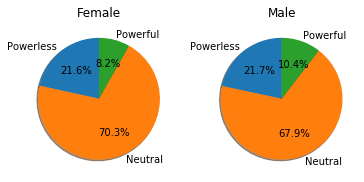

In [17]:
female_labels = list(df_female[['label']].values)
male_labels = list(df_male[['label']].values)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Powerless', 'Neutral', 'Powerful']
f_counts = [female_labels.count(1), female_labels.count(2), female_labels.count(3)]
m_counts = [male_labels.count(1), male_labels.count(2), male_labels.count(3)]


fig, axs = plt.subplots(1, 2)
axs[0].pie(f_counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].pie(m_counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title('Female')
axs[1].set_title('Male')


#plt.show()
plt.savefig('./../Data/graphs/mf_lang_pie')

In [19]:
# Hedging and intensifying counts f/m
total_f_sentences = df_female.shape[0]
total_m_sentences = df_male.shape[0]

f_hed_count = df_female[['Count_Adv_hedging', 'Count_V_hedging', 'Count_V_conj_hedging', 'Count_Adj_hedging']].sum().sum()/total_f_sentences
m_hed_count = df_male[['Count_Adv_hedging', 'Count_V_hedging', 'Count_V_conj_hedging', 'Count_Adj_hedging']].sum().sum()/total_m_sentences
f_int_count = df_female[['Count_Adv_intensifying', 'Count_V_intensifying','Count_Adj_intensifying']].sum().sum()/total_f_sentences
m_int_count = df_male[['Count_Adv_intensifying', 'Count_V_intensifying','Count_Adj_intensifying']].sum().sum()/total_m_sentences

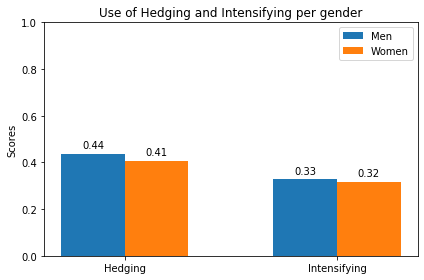

In [21]:
labels = ['Hedging', 'Intensifying']
men_means = [m_hed_count, m_int_count]
women_means = [f_hed_count, f_int_count]


x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Use of Hedging and Intensifying per gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim((0,1))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('./../Data/graphs/hegd_intense_bar')

In [22]:
df.columns

Index(['filename', 'sent_id', 'speaker', 'text', 'label', 'first_name',
       'last_name', 'tokens', 'lemmas', 'pos', 'adv_count',
       'NumberOfCharacters', 'MeanCharactersPerWord', 'SentenceLength',
       'NumberofUniqueWords', 'WordsVsUnique', 'Count_Adv_hedging',
       'Count_V_hedging', 'Count_V_conj_hedging', 'Count_Adj_hedging',
       'Count_Adv_intensifying', 'Count_V_intensifying',
       'Count_Adj_intensifying', 'Count_Yes_no', 'gender'],
      dtype='object')

In [34]:
def piechart_lang_count(columnname, df_female, df_male):
    female_labels = list(df_female[columnname].values)
    male_labels = list(df_male[columnname].values)

    f_labels, f_counts = get_labels_counts(female_labels)
    m_labels, m_counts = get_labels_counts(male_labels)
    
    print(columnname)
    print('Female')
    print(f_labels)
    print(f_counts)
    print('Male')
    print(m_labels)
    print(m_counts)


    fig, axs = plt.subplots(1, 2)
    axs[0].pie(f_counts, labels=f_labels,
               shadow=True, startangle=90)
    axs[1].pie(m_counts, labels=m_labels,
            shadow=True, startangle=90)
    axs[0].set_title('Female')
    axs[1].set_title('Male')
    
    fig.suptitle(columnname)

    plt.savefig(f'./../Data/graphs/{columnname}')

Count_Adv_hedging
Female
{0, 1, 2}
[249, 18, 2]
Male
{0, 1, 2, 3, 5}
[1529, 118, 23, 4, 2]
Count_V_hedging
Female
{0, 1, 2, 3, 4}
[228, 31, 6, 3, 1]
Male
{0, 1, 2, 3, 4, 5, 6}
[1402, 203, 48, 12, 9, 1, 1]
Count_V_conj_hedging
Female
{0, 1, 2}
[250, 16, 3]
Male
{0, 1, 2}
[1583, 77, 16]
Count_Adj_hedging
Female
{0, 1}
[260, 9]
Male
{0, 1, 2, 3}
[1625, 47, 3, 1]
Count_Adv_intensifying
Female
{0, 1, 2, 3, 4}
[234, 28, 5, 1, 1]
Male
{0, 1, 2, 3, 5}
[1474, 172, 22, 6, 2]
Count_V_intensifying
Female
{0, 1, 2}
[254, 14, 1]
Male
{0, 1, 2, 3}
[1548, 117, 10, 1]
Count_Adj_intensifying
Female
{0, 1, 2}
[249, 16, 4]
Male
{0, 1, 2, 3, 4}
[1541, 107, 24, 2, 2]
Count_Yes_no
Female
{0, 1, 2, 3}
[171, 94, 3, 1]
Male
{0, 1, 2, 4}
[1083, 583, 9, 1]


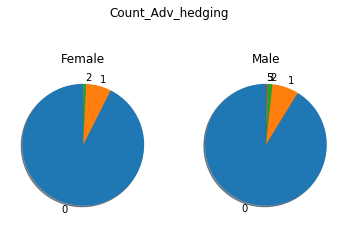

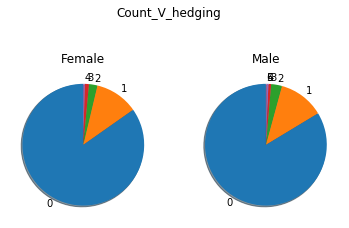

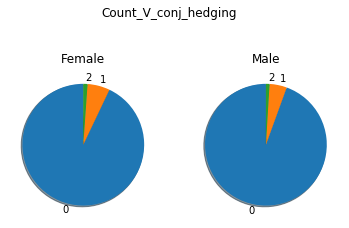

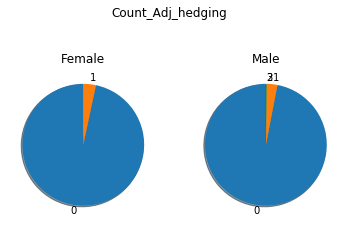

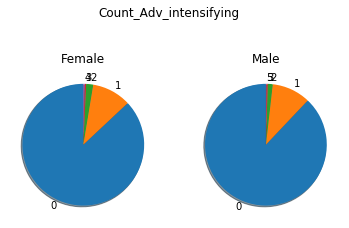

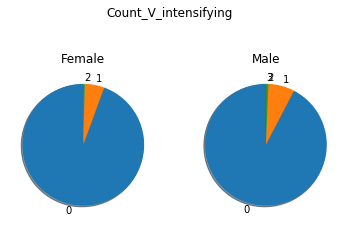

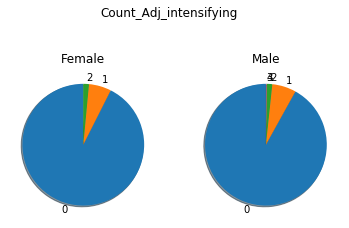

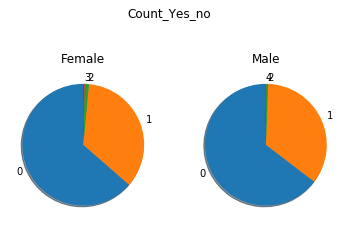

In [35]:
column_selection = ['Count_Adv_hedging',
       'Count_V_hedging', 'Count_V_conj_hedging', 'Count_Adj_hedging',
       'Count_Adv_intensifying', 'Count_V_intensifying',
       'Count_Adj_intensifying', 'Count_Yes_no']
for variable in column_selection:
    piechart_lang_count(variable, df_female, df_male)